<a href="https://colab.research.google.com/github/Manjunath727/DL/blob/master/3_LinearRegression/5_DemmingRegresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step #50 A = [[2.4487572]] b = [[2.5558124]]
Loss = 0.35080191
Step #100 A = [[2.3873882]] b = [[2.7877545]]
Loss = 0.39008224
Step #150 A = [[2.1877358]] b = [[2.9445193]]
Loss = 0.41124478
Step #200 A = [[2.0868015]] b = [[3.1804156]]
Loss = 0.4158316
Step #250 A = [[1.9013801]] b = [[3.4407234]]
Loss = 0.32852748


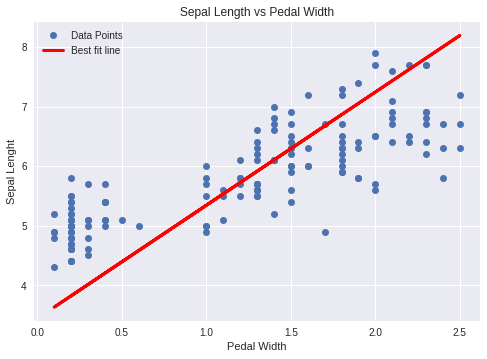

In [8]:
# Deming Regression
# Loss function in regular regression is of vertical distance
# With Deming Regression, loss is calculated to minimize total distance

# Load libraries, start session, create placeholders, variables, model 
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
sess = tf.Session()
iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])
batch_size = 50
x_data = tf.placeholder(shape=[None,1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None,1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))
model_output = tf.add(tf.matmul(x_data, A), b)


# Loss calculation
# For Deming Regression, give an line, y = mx + b and a point x0, y0, the
# perpendicular distance is d = |y0 - (mx0 + b)|/(sqrt(m^2 + 1))
# Caluating numerator and denominator separately
demming_numerator = tf.abs(tf.subtract(y_target, tf.add(tf.matmul(x_data, A), b)))
demming_denominator = tf.sqrt(tf.add(tf.square(A),1))
loss = tf.reduce_mean(tf.truediv(demming_numerator, demming_denominator))

# Initialize variables, declare our optimizer, and loop through training set
init = tf.global_variables_initializer()
sess.run(init)
my_opt = tf.train.GradientDescentOptimizer(0.1)
train_step = my_opt.minimize(loss)
loss_vec = []
for i in range(250):
  rand_index = np.random.choice(len(x_vals), size=batch_size)
  rand_x = np.transpose([x_vals[rand_index]])
  rand_y = np.transpose([y_vals[rand_index]])
  sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
  temp_loss = sess.run(loss, feed_dict={x_data:rand_x, y_target: rand_y})
  loss_vec.append(temp_loss)
  if (i+1)%50==0:
    print('Step #''' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
    print('Loss = ' + str(temp_loss))
    
# Plot output 
[slope] = sess.run(A)
[y_intercept]= sess.run(b)
best_fit = []
for i in x_vals:
  best_fit.append(slope*i + y_intercept)
plt.plot(x_vals, y_vals, 'o', label='Data Points')
plt.plot(x_vals, best_fit, 'r-', label = 'Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.title('Sepal Length vs Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Lenght')
plt.show()